# Promotion vs Sales

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('tableau-colorblind10')
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

# Table of content
### 1. Load and merge
### 2. Sales vs Promo and Promo2
### 3. Promo in Store Types
____



## 1. Load and merge

In [4]:
train = pd.read_csv("../../data/train.csv")
store = pd.read_csv("../../data/store.csv")

/Users/magdalenablum-oeste/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
merged_train_store = pd.merge(store, train, on='Store', how='left')

In [6]:
merged_train_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-01,2.0,0.0,0.0,0.0,0.0,a,1.0
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-02,3.0,5530.0,668.0,NaN,0.0,0,1.0
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-03,4.0,4327.0,578.0,1.0,0.0,0,1.0
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-04,5.0,4486.0,619.0,1.0,0.0,0,1.0
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-05,6.0,4997.0,635.0,1.0,0.0,NaN,1.0


## 2. Sales vs Promo and Promo2

In [7]:
# Convert Date to datetime and create a new column 'Month'
merged_train_store.Date = pd.to_datetime(merged_train_store.Date)
merged_train_store['Month'] = merged_train_store.Date.dt.month

### 2.1 Difference in Sales between Stores with Promo and Promo2

#### a) in months when there is Promo = 1, there is a considerable change in Sales.

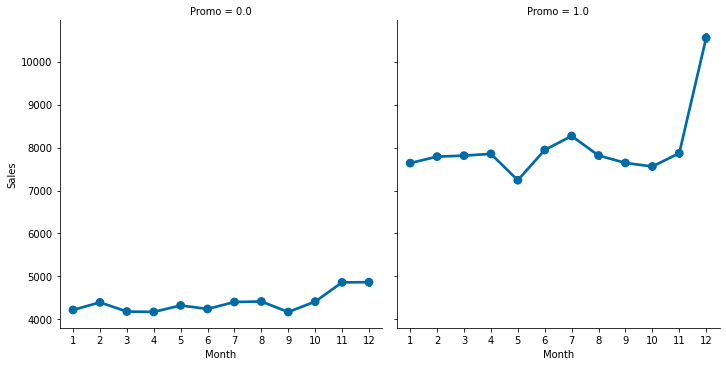

In [15]:
sns.catplot(x='Month', y='Sales',
               col='Promo',
               kind='point',
               data=merged_train_store);
#plt.title('Difference in Sales between Stores with Promo and Promo2')

#### b) in months, adding dimension of Promo2 to Promo, generally Sales are higher when there is no Promo2 (no consecutive promotion).

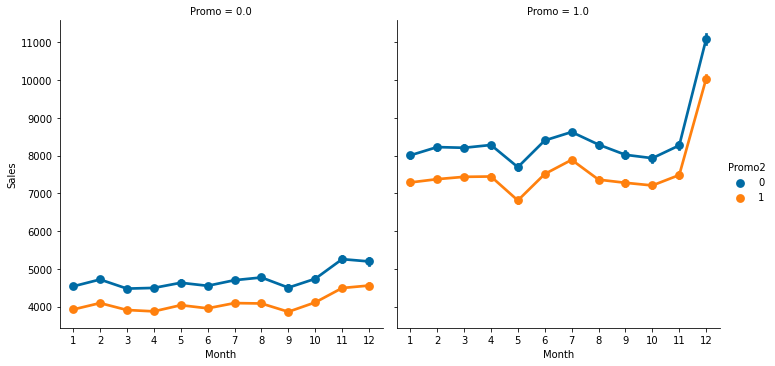

In [16]:
sns.catplot(x='Month', y='Sales',
               col='Promo',
               hue='Promo2',
               kind='point',
               data=merged_train_store);

#### c) in days of week

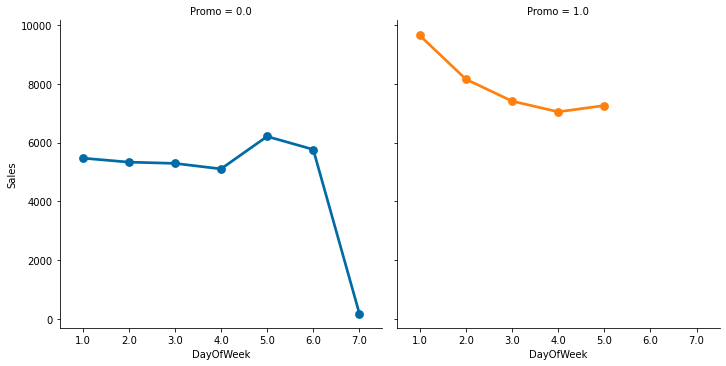

In [18]:
sns.catplot(x='DayOfWeek', y='Sales',
               col='Promo',
               hue='Promo',
               kind='point',
               data=merged_train_store);

#### d) just looking on the difference in Promo

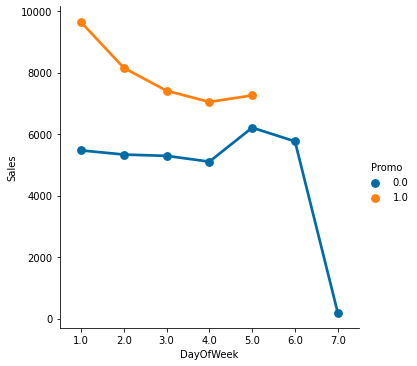

In [22]:
sns.catplot(x='DayOfWeek', y='Sales',
               hue='Promo',
               kind='point',
               data=merged_train_store);

## 3. Promo in Store Types

#### a) Promo in StoreType

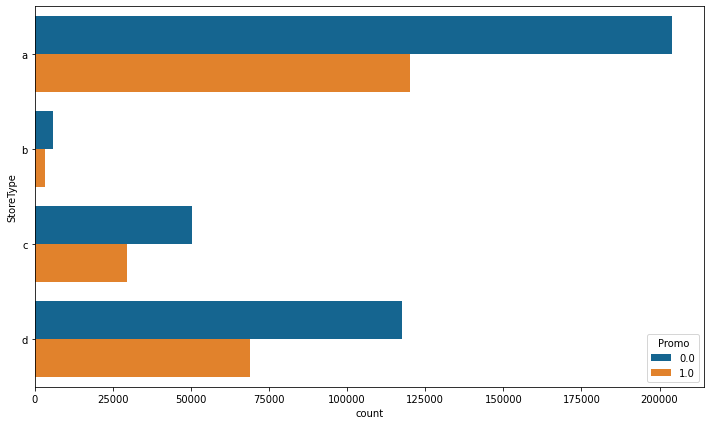

In [28]:
plt.figure(figsize=(12, 7))
sns.countplot(y='StoreType',
              hue='Promo',
              data=merged_train_store.sort_values(by = ['StoreType']));

#### b) Promo in Assortment

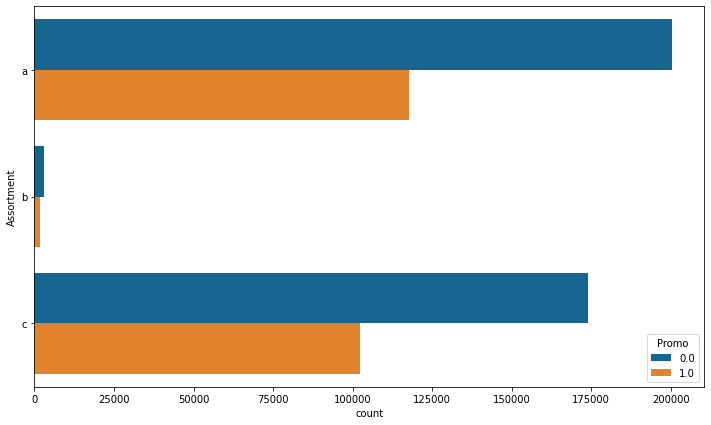

In [34]:
plt.figure(figsize=(12, 7))
sns.countplot(y='Assortment',
              hue='Promo',
              data=merged_train_store.sort_values(by = ['Assortment']));

#### c) Promo and Promo2 in Store Type 

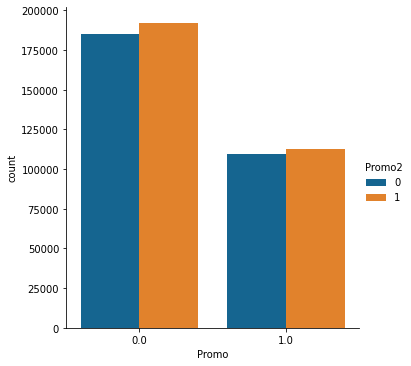

In [32]:
sns.catplot(x='Promo', 
            hue='Promo2',
            kind="count",
            data=merged_train_store);